In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure
from imutils import contours
import imutils

In [2]:
with open('multiple_spots.npy', 'rb') as f:
    hole_hand = np.load(f)

In [3]:
hole_hand.shape

(14, 256, 192)

In [3]:
#hole_hand = np.transpose(hole_hand, (2, 0, 1))

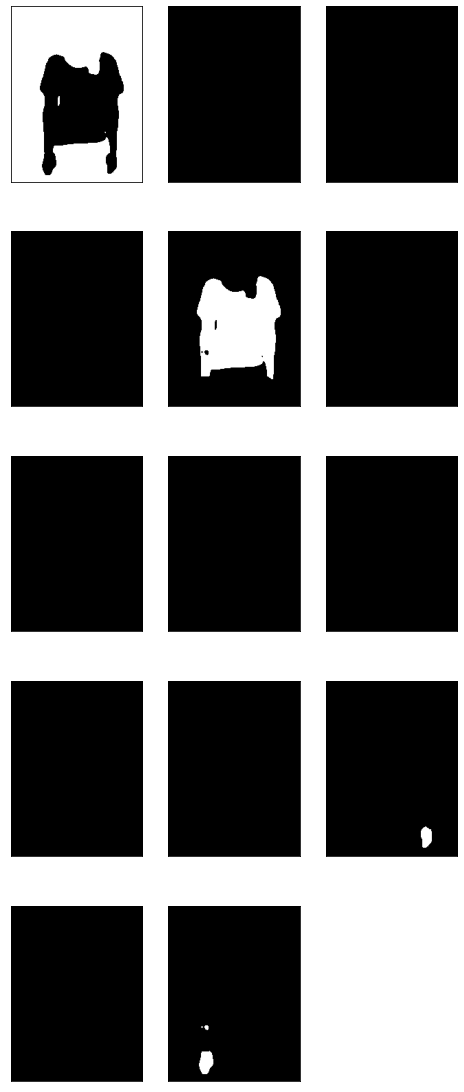

In [4]:
# 14
fig = plt.figure(figsize=(8, 20))

for i in range(14):
    ax = fig.add_subplot(5, 3, i+1)
    plt.imshow(hole_hand[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()

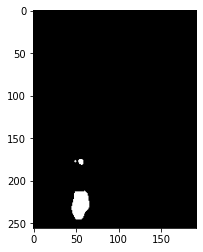

In [5]:
left_arm = hole_hand[13]
plt.imshow(left_arm, cmap='gray')

In [6]:
left_arm = left_arm.astype(int)

In [7]:
left_arm.shape

(256, 192)

In [8]:
labels = measure.label(left_arm, background=0)
# loop over the unique components
list_of_spots = []
for label in np.unique(labels):
# if this is the background label, ignore it
    if label == 0:
        continue

    labelMask = np.zeros(left_arm.shape, dtype="uint8")
    labelMask[labels == label] = 1
    list_of_spots.append(labelMask)

In [9]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int64)

In [10]:
number_of_spots = len(list_of_spots)
print(number_of_spots)

3


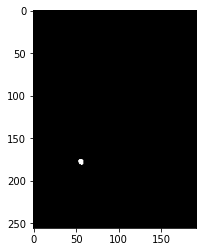

In [11]:
plt.imshow(list_of_spots[0], cmap='gray')

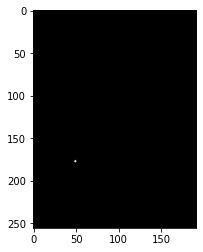

In [12]:
plt.imshow(list_of_spots[1], cmap='gray')

# Calculate Area 

In [13]:
def spotArea(spots):
    area = []
    i = 0
    for spot in spots:
        count = (spot == 1).sum()
        area.append([count, i])
        i += 1
    area.sort()
    sort_index = []
    for x in area:
        sort_index.append(x[1])
    return sort_index

small_big_spot_index = spotArea(list_of_spots)

In [14]:
unwanted_spot = []
for i in range(number_of_spots-1):
    small_index = small_big_spot_index[i]
    unwanted_spot.append(list_of_spots[small_index])
    
wanted_spot = list_of_spots[small_big_spot_index[-1]]

In [16]:
small_big_spot_index

[1, 0, 2]

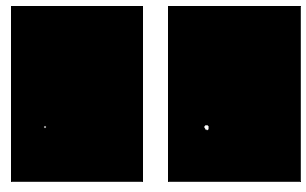

In [37]:
fig = plt.figure(figsize=(8, 20))

for i in range(len(unwanted_spot)):
    ax = fig.add_subplot(5, 3, i+1)
    plt.imshow(unwanted_spot[i], cmap = 'gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()

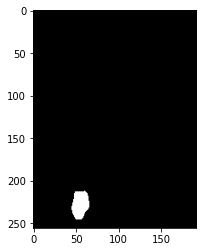

In [38]:
plt.imshow(wanted_spot, cmap='gray')

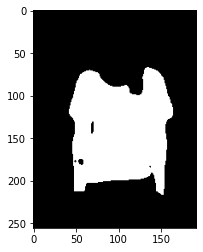

In [48]:
torso = hole_hand[4]
plt.imshow(torso, cmap='gray')

In [49]:
size = hole_hand.shape[1:3]

for t in range(number_of_spots-1):
    for i in range(size[0]):
        for j in range(size[1]):
            if unwanted_spot[t][i][j] == 1:
                torso[i][j] = 1

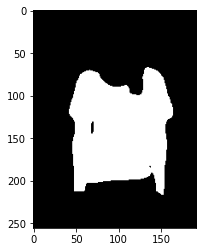

In [50]:
plt.imshow(torso, cmap='gray')

In [51]:
hole_hand[4] = torso

In [52]:
hole_hand[13] = wanted_spot

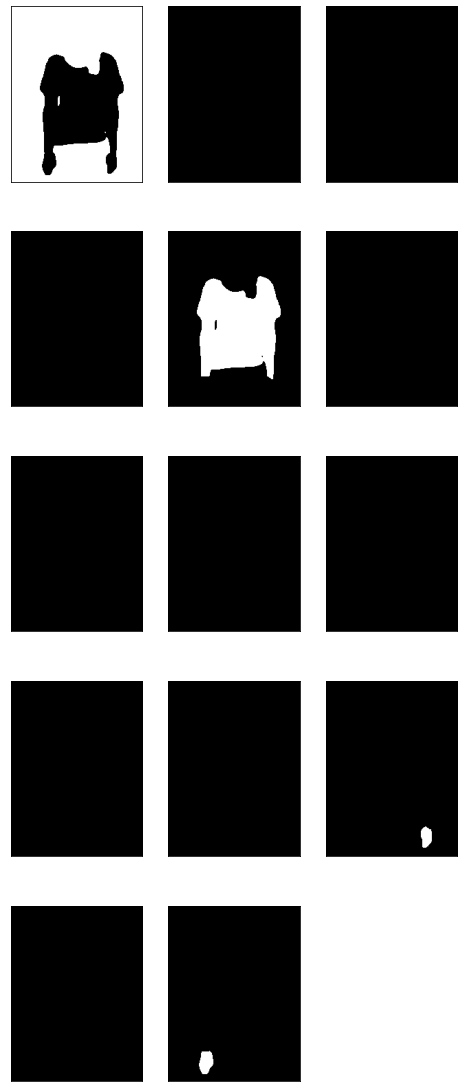

In [53]:
fig = plt.figure(figsize=(8, 20))

for i in range(14):
    ax = fig.add_subplot(5, 3, i+1)
    plt.imshow(hole_hand[i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()